In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ipykernel
import sklearn

print("Numpy Version: ",np.__version__)
print("Pandas Version: ",pd.__version__)
print("Matplotlib Version: ",matplotlib.__version__)
print("Sklearn Version: ",sklearn.__version__)
print("ipykernel Version: ",ipykernel.__version__)

Numpy Version:  2.0.2
Pandas Version:  2.3.3
Matplotlib Version:  3.9.4
Sklearn Version:  1.6.1
ipykernel Version:  6.31.0


# 📘 Regularization (L1, L2, ElasticNet)

Regularization is a technique used to **reduce overfitting** by adding a penalty to the model's complexity.

---

## ❗ Why Overfitting Happens?
- Model learns noise from training data  
- High variance  
- Performs poorly on unseen test data  

---

## 🎯 How Regularization Helps?
Regularization **shrinks model coefficients**, making the model simpler and preventing overfitting.

---

## 🧮 Types of Regularization

### ⭐ L2 Regularization (Ridge)
- Adds penalty: **α * sum(weights²)**
- Shrinks weights smoothly
- Does **not** make weights exactly zero

### ⭐ L1 Regularization (Lasso)
- Adds penalty: **α * sum(|weights|)**
- Can shrink some weights **exactly to zero**
- Performs feature selection

### ⭐ ElasticNet
- Combines L1 + L2 penalties  
- Good when:
  - Dataset is high-dimensional
  - Features are highly correlated  

---

In the next cells, we will:
1. Create a dataset  
2. Train Ridge, Lasso, and ElasticNet models  
3. Compare coefficients  
4. Compare performance  


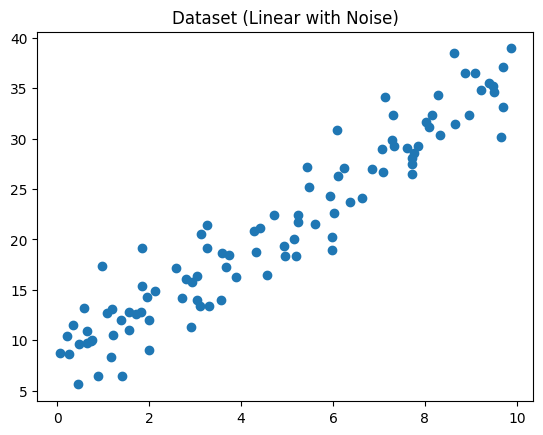

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 7 + np.random.normal(0, 3, 100)  # Linear with noise

# Plot data
plt.scatter(X, y)
plt.title("Dataset (Linear with Noise)")
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Baseline Model (Without Regularization)

We first train a simple **Linear Regression** model  
so we can compare it with Ridge, Lasso, and ElasticNet.


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

print("Linear Regression Coefficient:", lin_model.coef_)
print("Linear Regression Intercept:", lin_model.intercept_)
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Linear Regression Coefficient: [2.87959419]
Linear Regression Intercept: 7.428739958375699
Train MSE: 7.6291097077887375
Test MSE: 5.883295623453025


# ⭐ L2 Regularization — Ridge Regression

### 🧮 Penalty: α * sum(weights²)

### Properties:
- Shrinks weights smoothly  
- Good for multicollinearity  
- Reduces overfitting  
- Does NOT make coefficients exactly zero  

We use Ridge Regression with different values of α (lambda).


In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

print("Ridge Coefficient:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

y_pred_test_ridge = ridge.predict(X_test)
print("Test MSE (Ridge):", mean_squared_error(y_test, y_pred_test_ridge))


Ridge Coefficient: [2.83777221]
Ridge Intercept: 7.624508077841359
Test MSE (Ridge): 5.837529719981364


# ⭐ L1 Regularization — Lasso Regression

### 🧮 Penalty: α * sum(|weights|)

### Properties:
- Shrinks some weights to **exact zero**
- Does **feature selection**
- Useful when many features are irrelevant
- Can be unstable when features are correlated

We test Lasso with α = 1.


In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

print("Lasso Coefficient:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)

y_pred_test_lasso = lasso.predict(X_test)
print("Test MSE (Lasso):", mean_squared_error(y_test, y_pred_test_lasso))


Lasso Coefficient: [2.7616933]
Lasso Intercept: 7.980632372987005
Test MSE (Lasso): 5.842923245342062


# ⭐ ElasticNet (L1 + L2 Regularization)

### Formula:
Penalty = α * ( L1_ratio * L1_penalty + (1–L1_ratio) * L2_penalty )

### Properties:
- Combines benefits of Lasso + Ridge  
- Works well when:
  - Features are correlated  
  - Dataset is high-dimensional (p >> n)  

We use:
- α = 1
- L1_ratio = 0.5  → equal mix of L1 & L2


In [6]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

print("ElasticNet Coefficient:", elastic.coef_)
print("ElasticNet Intercept:", elastic.intercept_)

y_pred_test_elastic = elastic.predict(X_test)
print("Test MSE (ElasticNet):", mean_squared_error(y_test, y_pred_test_elastic))


ElasticNet Coefficient: [2.66362203]
ElasticNet Intercept: 8.43970256207884
Test MSE (ElasticNet): 6.018666271442322


# 📊 Compare Coefficients + Errors

We visualize how Linear Regression, Ridge, Lasso, and ElasticNet  
change the model coefficients and how they affect performance.


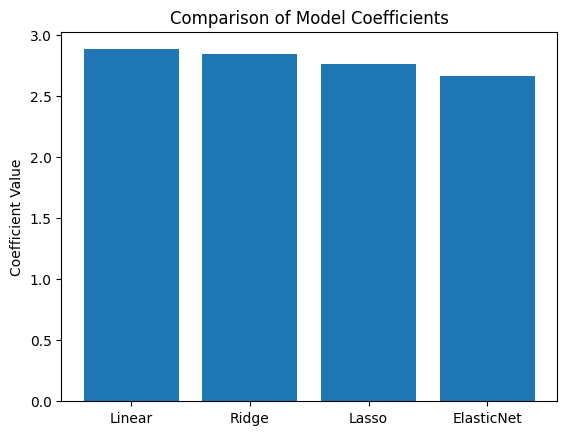

In [7]:
models = ["Linear", "Ridge", "Lasso", "ElasticNet"]
coeffs = [
    lin_model.coef_[0],
    ridge.coef_[0],
    lasso.coef_[0],
    elastic.coef_[0]
]

plt.bar(models, coeffs)
plt.title("Comparison of Model Coefficients")
plt.ylabel("Coefficient Value")
plt.show()


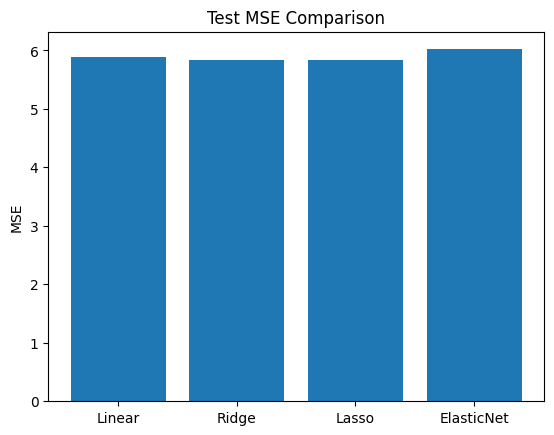

In [8]:
test_mse_values = [
    mean_squared_error(y_test, y_pred_test),
    mean_squared_error(y_test, y_pred_test_ridge),
    mean_squared_error(y_test, y_pred_test_lasso),
    mean_squared_error(y_test, y_pred_test_elastic),
]

plt.bar(models, test_mse_values)
plt.title("Test MSE Comparison")
plt.ylabel("MSE")
plt.show()


# 🎯 Final Summary — Regularization

## ⭐ Ridge (L2)
- Penalizes squared coefficients  
- Shrinks but never eliminates features  
- Best for multicollinearity  

## ⭐ Lasso (L1)
- Penalizes absolute coefficients  
- Can eliminate features  
- Performs automatic feature selection  

## ⭐ ElasticNet
- Combines L1 + L2  
- Best when:
  - Many features  
  - Features are correlated  
  - Dataset is high-dimensional  

## 🎯 Why Regularization?
- Avoids overfitting  
- Improves generalization  
- Controls model complexity  
